In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime

In [33]:
df_main = pd.read_csv("dataset_till_Oct_19_QTY.csv")

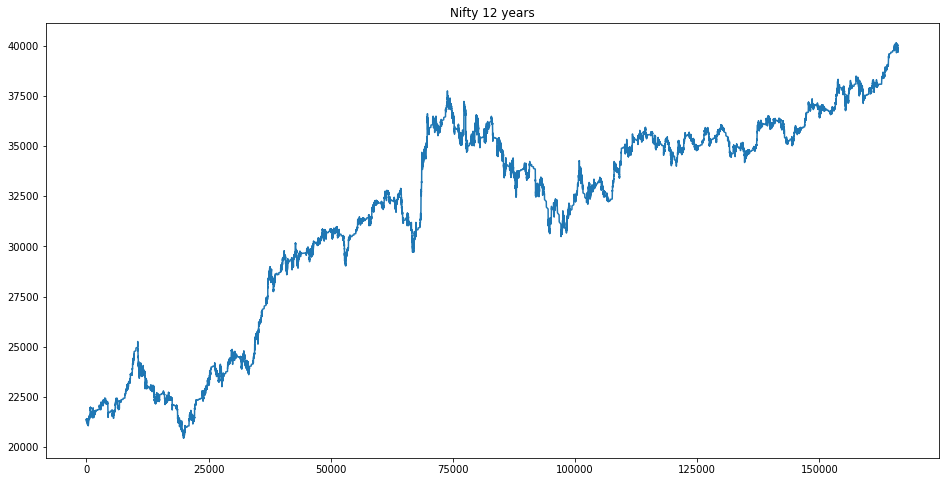

In [45]:
plt.figure(figsize = (16,8))
plt.title('Nifty 12 years')
plt.plot(df_main.CLOSE)
#plt.plot(df[0:50000].CLOSE)
#plt.scatter(z, y, s=2)
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price',fontsize=18)
plt.show()

In [35]:
df7 = df_main[['CLOSE','VOLUME']]
training_size=161250
test_size=len(df7)-training_size
train_data,test_data=df7[0:training_size],df7[training_size:len(df7)]
print(train_data.shape)
print(test_data.shape)

(161250, 2)
(4875, 2)


In [36]:
df11 = train_data['CLOSE']
df22 = train_data['VOLUME']

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df11 = df11.values
df22 = df22.values

df11 = df11.reshape((len(df11), 1))
df22 = df22.reshape((len(df22), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
df11_scaled = scaler.fit_transform(df11)
df22_scaled = scaler.fit_transform(df22)

dataset_stacked = np.hstack((df11_scaled, df22_scaled))
dataset_stacked.shape

(161250, 2)

In [38]:
def to_supervised(train, n_input, n_out):
	# flatten data
	X, y = [], []
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(train)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end < len(train):
			x_input = train[in_start:in_end]
			x_input = x_input.reshape((len(x_input), 2))
			X.append(x_input)
			y.append(train[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return np.array(X), np.array(y)

In [39]:
X_train, y_train = to_supervised(dataset_stacked,5,1)
print(X_train.shape), print(y_train.shape)

(161244, 5, 2)
(161244, 1)


(None, None)

In [40]:
#deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
import tensorflow as tf

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,2)))
#model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
#model = tf.keras.models.load_model("Stock_model_BANNIFTY_5min_1min_qty.hdf5")
model.fit(X_train,y_train,epochs=20,batch_size=64,verbose=1)

Train on 161244 samples
Epoch 1/20
161244/161244 [==============================] - 40s 251us/sample - loss: 2.1331e-06
Epoch 2/20
161244/161244 [==============================] - 36s 223us/sample - loss: 2.2273e-06
Epoch 3/20
161244/161244 [==============================] - 31s 195us/sample - loss: 2.0918e-06
Epoch 4/20
161244/161244 [==============================] - 39s 244us/sample - loss: 2.1449e-06
Epoch 5/20
161244/161244 [==============================] - 40s 249us/sample - loss: 2.1874e-06
Epoch 6/20
161244/161244 [==============================] - 34s 210us/sample - loss: 2.1267e-06
Epoch 7/20
161244/161244 [==============================] - 33s 202us/sample - loss: 2.0867e-06
Epoch 8/20
161244/161244 [==============================] - 32s 197us/sample - loss: 2.1298e-06
Epoch 9/20
161244/161244 [==============================] - 33s 207us/sample - loss: 2.0307e-06
Epoch 10/20
161244/161244 [==============================] - 33s 208us/sample - loss: 2.1368e-06
Epoch 11/20
161

In [49]:
model.save("Stock_model_BANNIFTY_5min_1min_qty_1.hdf5")

In [27]:
df33 = test_data['CLOSE']
df44 = test_data['VOLUME']

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df33 = df33.values
df44 = df44.values

df33 = df33.reshape((len(df33), 1))
df44 = df44.reshape((len(df44), 1))

scaler1 = MinMaxScaler(feature_range=(0, 1))
df33_scaled = scaler1.fit_transform(df33)
df44_scaled = scaler.fit_transform(df44)

dataset_stacked_test = np.hstack((df33_scaled, df44_scaled))
dataset_stacked_test.shape

(4875, 2)

In [29]:
X_test, y_test = to_supervised(dataset_stacked_test,5,1)
print(X_test.shape), print(y_test.shape)

(4873, 1, 2)
(4873, 1)


(None, None)

In [30]:
model = tf.keras.models.load_model("Stock_model_BANNIFTY_1min_qty.hdf5")
test_predict=model.predict(X_test)
test_predict=scaler1.inverse_transform(test_predict)
print(test_predict)

[[37976.258]
 [38048.543]
 [38066.97 ]
 ...
 [39768.598]
 [39758.457]
 [39752.785]]


In [31]:
test_predict.shape

(4873, 1)